In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
listings = pd.read_csv("../input/chicago-airbnb-open-data/listings.csv")

# Data Exploration

In [40]:
#Load path here
path = "../input/chicago-airbnb-open-data/listings.csv"

def load(path, info = True):
    
    import pandas as pd
    import io
    
    if len(path.split(".csv")) > 1: #if extension is csv than read_csv
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1: #if extension is xlsx, read_excel
        read = pd.read_excel(path)
    
    if info: #info will always be true
        if len(read) > 0: #number of row>0
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n") #shape 0 is for column and shape 1 for rows
    
            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read
    
ab = load(path, info = True)
ab.head()

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 6397 Column: 16 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 5 
 ['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'] 

Integer Variables: 
 # of Variables: 7 
 ['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'] 

Float Variables: 
 # of Variables: 4 
 ['neighbourhood_group', 'latitude', 'longitude', 'reviews_per_month'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  Data includes missing value! 

# MEMORY USAGE ---------------------- 
 799.8+ KB


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [6]:
listings.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
5,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91183,-87.64000,Entire home/apt,115,4,19,2020-08-06,0.24,9,325
6,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90452,-87.63320,Entire home/apt,99,5,9,2019-01-14,0.13,1,316
7,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,2018-10-17,0.06,1,179
8,22362,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,85811,Craig,NaN,West Town,41.89617,-87.66041,Entire home/apt,99,91,9,2014-10-12,0.11,2,365
9,24833,Private Apt 1 Block to Fullerton L Red Line - ...,101521,Red,NaN,Lincoln Park,41.92679,-87.65521,Entire home/apt,112,32,37,2018-07-29,0.29,4,180


In [7]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6.397000e+03,0.0,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,5265.000000,6397.000000,6397.000000
mean,2.813857e+07,9.850262e+07,NaN,41.899049,-87.664042,153.020009,8.113178,42.753791,1.745280,13.598718,174.272159
std,1.288337e+07,9.990222e+07,NaN,0.058929,0.042414,376.207706,22.786856,67.051609,1.745491,37.180574,138.877601
min,2.384000e+03,2.140000e+03,NaN,41.647360,-87.846810,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.875555e+07,1.705221e+07,NaN,41.872740,-87.687460,64.000000,1.000000,2.000000,0.430000,1.000000,36.000000
50%,2.994743e+07,5.738786e+07,NaN,41.901860,-87.660880,99.000000,2.000000,15.000000,1.230000,2.000000,161.000000
75%,3.959279e+07,1.580558e+08,NaN,41.939780,-87.633160,155.000000,3.000000,56.000000,2.570000,7.000000,329.000000
max,4.551558e+07,3.679071e+08,NaN,42.022510,-87.537520,10000.000000,500.000000,632.000000,32.430000,205.000000,365.000000


# Handle Missing Values

In [8]:
percent_missing = listings.isnull().sum() * 100 / len(listings)
missing_value_df = pd.DataFrame({'column_name': listings.columns,
                                 'percent_missing': percent_missing})

missing_value_df=missing_value_df.reset_index(drop=True)

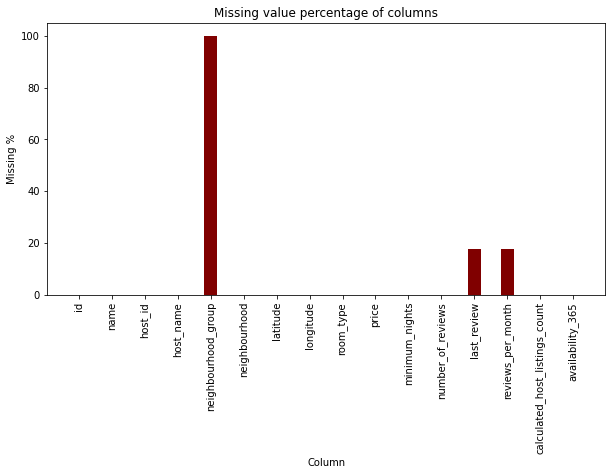

In [34]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(missing_value_df.iloc[:,0],missing_value_df.iloc[:,1] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Column_names")
plt.xticks(rotation=90)
plt.ylabel("Missing %")
plt.title("Missing value percentage of columns")
plt.show()

In [36]:
listings = listings.dropna(thresh=0.6, axis=1)

# EDA
**Exploratory Data Analysis**

In [50]:
print('NumericColumns',listings.select_dtypes("integer").columns.tolist())
print('CategoricalColumns',listings.select_dtypes("object").columns.tolist())
print('FloatColumns',listings.select_dtypes("float").columns.tolist())

NumericColumns ['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
CategoricalColumns ['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']
FloatColumns ['latitude', 'longitude', 'reviews_per_month']
